In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

datavfile1 = "datav/xi_Y3_shear_model.txt"
datavfile2 = "datav/Y3_shear_final.txt"


d1 = np.genfromtxt(datavfile1)[:,1]
d2 = np.genfromtxt(datavfile2)[:,1]

#use this covariance for redmagic lens sample
covfile = "./cov_y3/cov_shear_final.txt"

ndata = d1.shape[0]
#file with Y1 scale cuts
m = np.genfromtxt("./yaml/1x2pt_0.5.mask")[:,1]

ind1 = np.where(m)
ind0 = np.where(m-1.0)
data = np.genfromtxt(covfile)
cov =np.zeros((ndata,ndata))
for i in range(0,data.shape[0]):
	cov[int(data[i,0]),int(data[i,1])] = data[i,2]
	cov[int(data[i,1]),int(data[i,0])] = data[i,2]
	if (int(data[i,0])-int(data[i,1])):
		cov[int(data[i,0]),int(data[i,1])]*= m[int(data[i,0])]*m[int(data[i,1])]  	
		cov[int(data[i,1]),int(data[i,0])]*= m[int(data[i,0])]*m[int(data[i,1])]

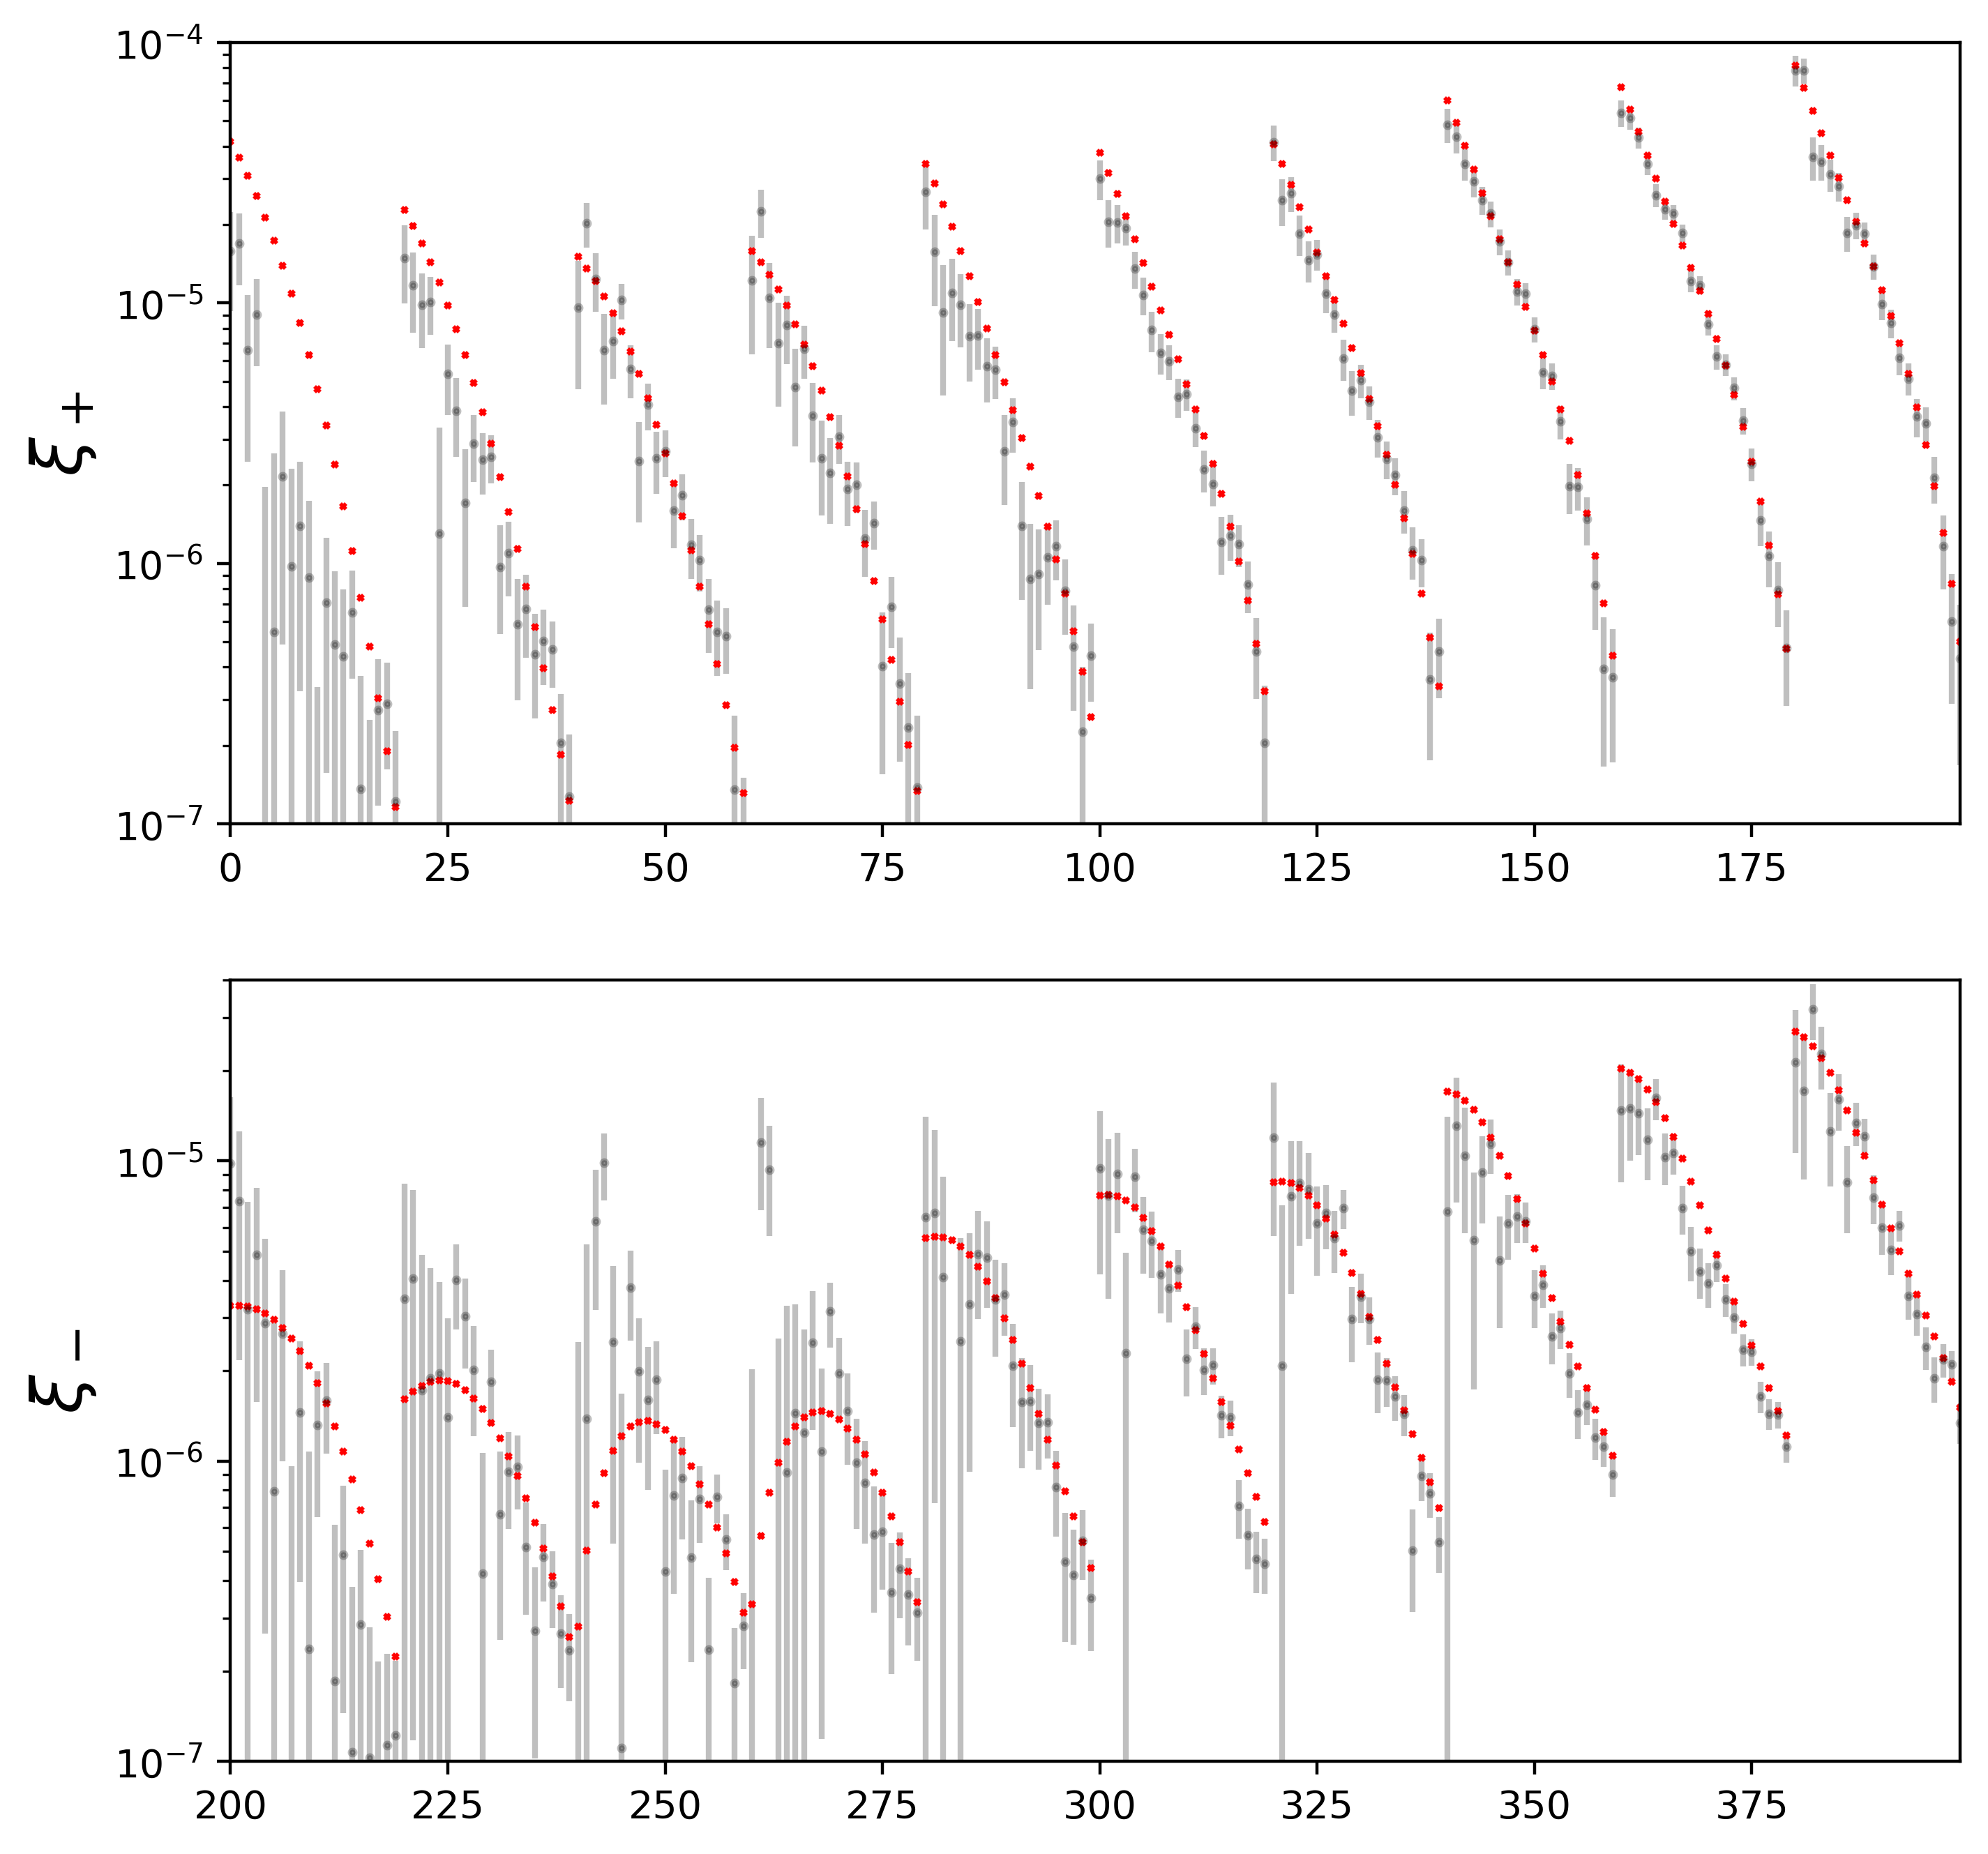

In [13]:
nxip = 200
nxim = 200
ind = np.arange(0,ndata)
s = np.sqrt(np.diag(cov))

plt.figure(figsize=(8,8), dpi=400)
fs = 18
plt.subplot(2,1,1)
plt.yscale('log')
plt.ylim(1.e-7,1e-4)
plt.xlim(0,nxip-1)
#plt.title(r'$\xi_+$')
plt.ylabel(r'$\xi_+$', fontsize = fs)
#plot data
plt.errorbar(ind,d2,s,marker='o', color='k',linestyle = '',markersize = 1.5,alpha = 0.25)
#plot model
plt.plot(ind,d1,marker='x', color='r',linestyle = '',markersize = 1.5)



plt.subplot(2,1,2)
plt.yscale('log')
plt.ylim(1.e-7,4.e-5)
plt.xlim(nxip,nxip+nxim-1)
#plt.title(r'$\xi_-$')
plt.ylabel(r'$\xi_-$', fontsize = fs)
plt.errorbar(ind,d2,s,marker='o', color='k',linestyle = '',markersize = 1.5,alpha = 0.25)
plt.plot(ind,d1,marker='x', color='r',linestyle = '',markersize = 1.5)
